In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay
from sklearn.utils.class_weight import compute_class_weight
from comet_ml import Experiment
import os
import configparser
np.random.seed(42)
from sklearn.metrics import confusion_matrix
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings('ignore')

In [2]:
import xgboost as xgb
from xgboost import XGBClassifier

In [77]:
from imblearn.over_sampling import ADASYN 

In [25]:
from graphs import *

In [3]:
config = configparser.ConfigParser()
config.read('../configfile.ini')
type_env = "comet_ml_prod" #comet_ml_prod
COMET_API_KEY = config[type_env]['api_key']
COMET_PROJECT_NAME = config[type_env]['project_name_advanced']
COMET_WORKSPACE = config[type_env]['workspace']

comet_exp_obj = Experiment(api_key=COMET_API_KEY,
                           project_name=COMET_PROJECT_NAME,
                           workspace=COMET_WORKSPACE,
                           log_code=True
                          )
comet_exp_obj.set_name(name="xgboost_dist_angle")
comet_exp_obj.log_notebook("11_advanced_models.ipynb")

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/data-science-workspace/advanced-models/8aa767f2703d4fcc8ca1376b6a22698b
COMET INFO:   Others:
COMET INFO:     Name : Baseline Models
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (4.41 KB)
COMET INFO:   

{'web': 'https://www.comet.com/api/asset/download?assetId=b65aedc7b2314986a42ab2aa2b3c0afb&experimentKey=2d037d7425ea4275ac44b3da8a7ec91a',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=b65aedc7b2314986a42ab2aa2b3c0afb&experimentKey=2d037d7425ea4275ac44b3da8a7ec91a',
 'assetId': 'b65aedc7b2314986a42ab2aa2b3c0afb'}

In [4]:
comet_exp_obj.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/data-science-workspace/advanced-models/2d037d7425ea4275ac44b3da8a7ec91a
COMET INFO:   Others:
COMET INFO:     Name : xgboost
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (4.41 KB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 2 (3.64 KB)
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET WARNING: Comet has disabled auto-logging functionali

In [14]:
x.columns

Index(['distance', 'angle', 'empty_net', 'game_period',
       'distance_from_last_event', 'rebound', 'change_in_shot_angle', 'speed',
       'x_coordinate', 'y_coordinate', 'game_seconds', 'shot_type_Backhand',
       'shot_type_Deflected', 'shot_type_NA', 'shot_type_Slap Shot',
       'shot_type_Snap Shot', 'shot_type_Tip-In', 'shot_type_Wrap-around',
       'shot_type_Wrist Shot', 'last_event_type_BLOCKED_SHOT',
       'last_event_type_FACEOFF', 'last_event_type_GIVEAWAY',
       'last_event_type_GOAL', 'last_event_type_HIT',
       'last_event_type_MISSED_SHOT', 'last_event_type_PENALTY',
       'last_event_type_SHOT', 'last_event_type_TAKEAWAY'],
      dtype='object')

In [78]:
ada = ADASYN(random_state=42)

In [79]:
x_train = pd.read_pickle("../data/dataset/x_train.pkl").drop(columns=['is_goal','game_id','season'])
x_val = pd.read_pickle("../data/dataset/x_val.pkl").drop(columns=['is_goal','game_id','season'])
y_train = pd.read_pickle("../data/dataset/y_train.pkl")
y_val = pd.read_pickle("../data/dataset/y_val.pkl")

x_train, y_train = ada.fit_resample(x_train,y_train) 

#x = x_train.append(x_val)
#y = y_train.append(y_val) 

In [80]:
x_train.shape,y_train.shape

((460669, 28), (460669,))

In [81]:
y_train.sum()

230888

In [17]:
#dtrain = xgb.DMatrix(data=x,label=y)

In [58]:
cw = (len(y)- y.sum())/y.sum()

### XGB with distance and angle as features

In [3]:
## Search for hyperparameters using kfoldCV and final metric on train/val 

In [ ]:
'''space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
'''

In [82]:
params = {
            'objective':['binary:logistic'],
            'max_depth': [2,4,6],
            'reg_alpha': [0.1,1.0],
            'learning_rate': [0.1,0.3],
            'n_estimators':[4,6,8,10]
        }

model = XGBClassifier(random_state=42)
grid = GridSearchCV(estimator=model,param_grid = params, scoring='f1',cv=3,return_train_score=True)
grid.fit(x_train[['angle','distance']].to_numpy(),y_train.to_numpy())
results = grid.cv_results_

#model.fit(x_train[['angle','distance']].to_numpy(),y_train.to_numpy())


#xgb_cv = xgb.cv(dtrain=dtrain, params=params, nfold=5,stratified=True,
#                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=42)

In [83]:
grid.best_params_

{'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 10,
 'objective': 'binary:logistic',
 'reg_alpha': 0.1}

In [84]:
y_pred = grid.best_estimator_.predict(x_train[['angle','distance']].to_numpy())
print(classification_report(y_train.to_numpy(),y_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68    229781
           1       0.68      0.73      0.70    230888

    accuracy                           0.69    460669
   macro avg       0.69      0.69      0.69    460669
weighted avg       0.69      0.69      0.69    460669



In [86]:
y_pred = grid.best_estimator_.predict(x_val[['angle','distance']].to_numpy())
print(classification_report(y_val.to_numpy(),y_pred))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     57445
           1       0.15      0.64      0.25      5700

    accuracy                           0.65     63145
   macro avg       0.55      0.64      0.51     63145
weighted avg       0.88      0.65      0.72     63145



In [24]:
grid.best_estimator_.feature_importances_

array([0.16684297, 0.83315706], dtype=float32)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.706


AttributeError: 'NoneType' object has no attribute 'log_metrics'

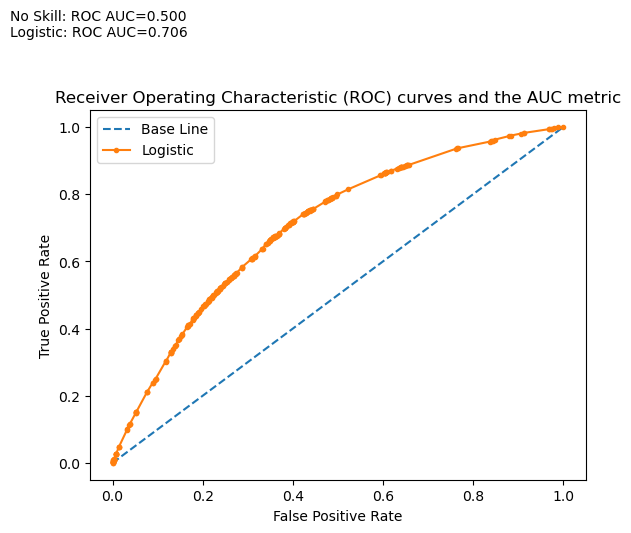

In [49]:
create_roc_auc_curve(None,grid.best_estimator_,x_val[['angle','distance']].to_numpy(),y_val.to_numpy())

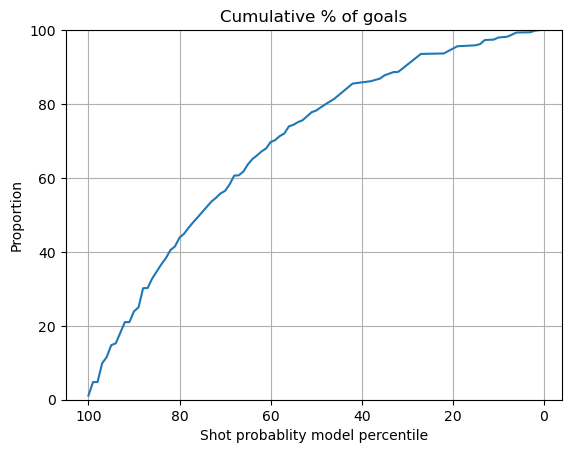

In [50]:
plot_cumulative_goal(None,grid.best_estimator_,x_val[['angle','distance']].to_numpy(),y_val.to_numpy())

AttributeError: 'NoneType' object has no attribute 'log_figure'

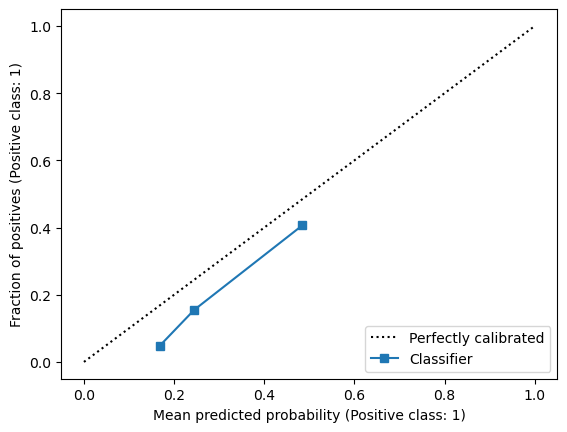

In [51]:
create_extimator_plot(None,grid.best_estimator_,x_val[['angle','distance']].to_numpy(),y_val.to_numpy())

AttributeError: 'NoneType' object has no attribute 'log_figure'

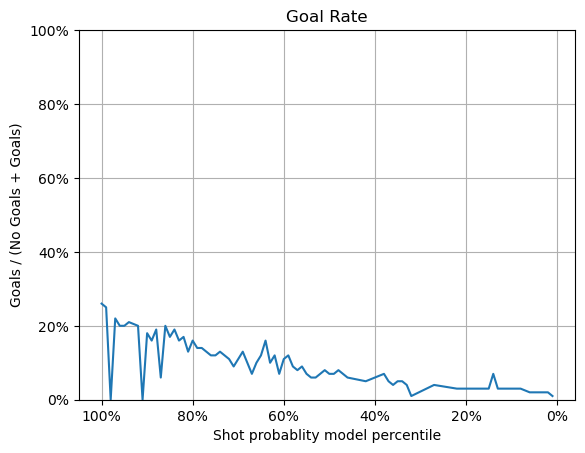

In [52]:
plot_goal_shot_rate(None,grid.best_estimator_,x_val[['angle','distance']].to_numpy(),y_val.to_numpy())

In [7]:
#xgb.plot_importance(xgb_cv)
#plt.figure(figsize = (16, 12))
#plt.show()

### XGB with all features

In [30]:
x.columns

Index(['distance', 'angle', 'empty_net', 'game_period',
       'distance_from_last_event', 'rebound', 'change_in_shot_angle', 'speed',
       'x_coordinate', 'y_coordinate', 'game_seconds', 'shot_type_Backhand',
       'shot_type_Deflected', 'shot_type_NA', 'shot_type_Slap Shot',
       'shot_type_Snap Shot', 'shot_type_Tip-In', 'shot_type_Wrap-around',
       'shot_type_Wrist Shot', 'last_event_type_BLOCKED_SHOT',
       'last_event_type_FACEOFF', 'last_event_type_GIVEAWAY',
       'last_event_type_GOAL', 'last_event_type_HIT',
       'last_event_type_MISSED_SHOT', 'last_event_type_PENALTY',
       'last_event_type_SHOT', 'last_event_type_TAKEAWAY'],
      dtype='object')

In [87]:
params = {
            'objective':['binary:logistic'],
            'max_depth': [4,6,8],
            'reg_alpha': [1.0],
            'reg_lambda':[1.0],
            'learning_rate': [0.3],
            'n_estimators':[25,45,70,100]
        }

model = XGBClassifier(random_state=42)
grid1 = GridSearchCV(estimator=model,param_grid = params, scoring='roc_auc',cv=3,return_train_score=True)
grid1.fit(x_train.to_numpy(),y_train.to_numpy())
results = grid1.cv_results_

In [88]:
grid1.best_params_

{'learning_rate': 0.3,
 'max_depth': 8,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'reg_alpha': 1.0,
 'reg_lambda': 1.0}

In [89]:
y_pred = grid1.best_estimator_.predict(x_train.to_numpy())
print(classification_report(y_train.to_numpy(),y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    229781
           1       1.00      0.90      0.95    230888

    accuracy                           0.95    460669
   macro avg       0.96      0.95      0.95    460669
weighted avg       0.96      0.95      0.95    460669



In [90]:
y_pred = grid1.best_estimator_.predict(x_val.to_numpy())
print(classification_report(y_val.to_numpy(),y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     57445
           1       0.70      0.07      0.13      5700

    accuracy                           0.91     63145
   macro avg       0.81      0.53      0.54     63145
weighted avg       0.90      0.91      0.88     63145



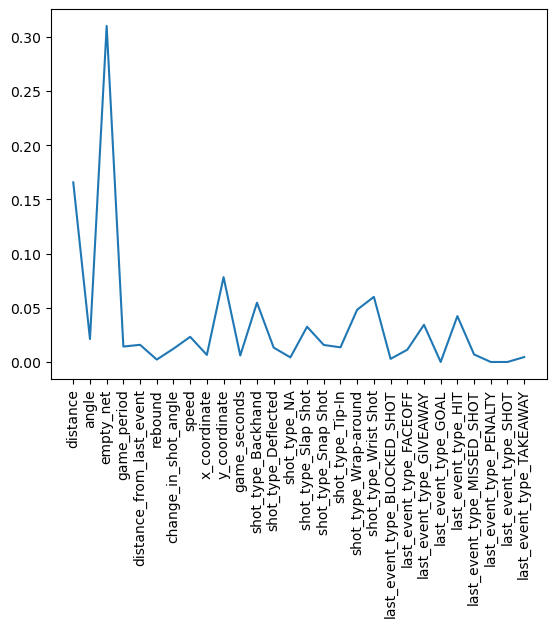

In [91]:
fi = grid1.best_estimator_.feature_importances_
plt.xticks(rotation=90)
plt.plot(list(x_train.columns.to_numpy()),fi)

### XGB with feature selection

In [72]:
fs = ['angle', 'distance_from_last_event', 'empty_net', 'shot_type_Wrap-around', 'y_coordinate', 'speed', 'distance', 'x_coordinate', 'game_period', 'shot_type_Tip-In', 'shot_type_Wrist Shot', 'game_seconds'] 



In [73]:
params = {
            'objective':['binary:logistic'],
            'max_depth': [4,6,8],
            'reg_alpha': [1.0],
            'reg_lambda':[1.0],
            'learning_rate': [0.1,0.4,1.0],
            'n_estimators':[25,35,50,70,100]
        }

model = XGBClassifier(random_state=42)
grid3 = GridSearchCV(estimator=model,param_grid = params, scoring='roc_auc',cv=3,return_train_score=True)
grid3.fit(x_train[fs].to_numpy(),y_train.to_numpy())
results = grid3.cv_results_

In [74]:
grid1.best_params_

{'learning_rate': 0.3,
 'max_depth': 4,
 'n_estimators': 45,
 'objective': 'binary:logistic',
 'reg_alpha': 1.0,
 'reg_lambda': 1.0}

In [75]:
y_pred = grid1.best_estimator_.predict(x_train.to_numpy())
print(classification_report(y_train.to_numpy(),y_pred))

              precision    recall  f1-score   support

           0       0.96      0.66      0.78    229781
           1       0.18      0.75      0.29     22799

    accuracy                           0.66    252580
   macro avg       0.57      0.70      0.53    252580
weighted avg       0.89      0.66      0.74    252580



In [76]:
y_pred = grid1.best_estimator_.predict(x_val.to_numpy())
print(classification_report(y_val.to_numpy(),y_pred))

              precision    recall  f1-score   support

           0       0.96      0.65      0.78     57445
           1       0.17      0.73      0.28      5700

    accuracy                           0.66     63145
   macro avg       0.57      0.69      0.53     63145
weighted avg       0.89      0.66      0.73     63145

